In [1]:
%matplotlib inline
# notebook
import sys
sys.path.insert(1,'../Utilities')

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from trophics import *
from collections import defaultdict
from taxonomicIndices import *
from foodWebGraphing import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24


Bad key "text.kerning_factor" on line 4 in
C:\Users\davie\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [24]:
rawEiggData = validatedEiggData()
# rawEiggData = rawEiggData[rawEiggData["Start date year"] > 1960]
rawEiggData.head()

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Recorder,Latitude (WGS84),Longitude (WGS84),Start date year,End date year,Scientific name,Common name
0,unknown,56.902729,-6.15936,1905.0,NaN,meloe violaceus,Violet Oil-beetle
1,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,rhantus suturellus,NaN
2,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,gyrinus substriatus,NaN
3,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,enochrus fuscipennis,NaN
4,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,boreonectes multilineatus,NaN


In [25]:
foodWeb = retrieveCollatedFoodWeb()
len(foodWeb)

10191

In [26]:
overall = set()

for item in foodWeb:
    item = item.split(" ")
    item = " ".join(item[:2])
    overall.add(item)

for fw in foodWeb:
    v = foodWeb[fw]
    for item in v:
        item = item.split(" ")
        item = " ".join(item[:2])
        overall.add(item)

print(len(overall))

13796


In [2]:
eiggSpecies = rawEiggData['Scientific name'].str.lower()
eiggSpecies = set(eiggSpecies)

iset = set()
animalsTotal = len(eiggSpecies)
totalFound = 0
for item in eiggSpecies:
    if item in overall:
        iset.add(item)
        totalFound += 1

print(totalFound,animalsTotal)
print(totalFound / animalsTotal)

NameError: name 'rawEiggData' is not defined

# Reproduction of manually made network

C:\Users\davie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


31 46


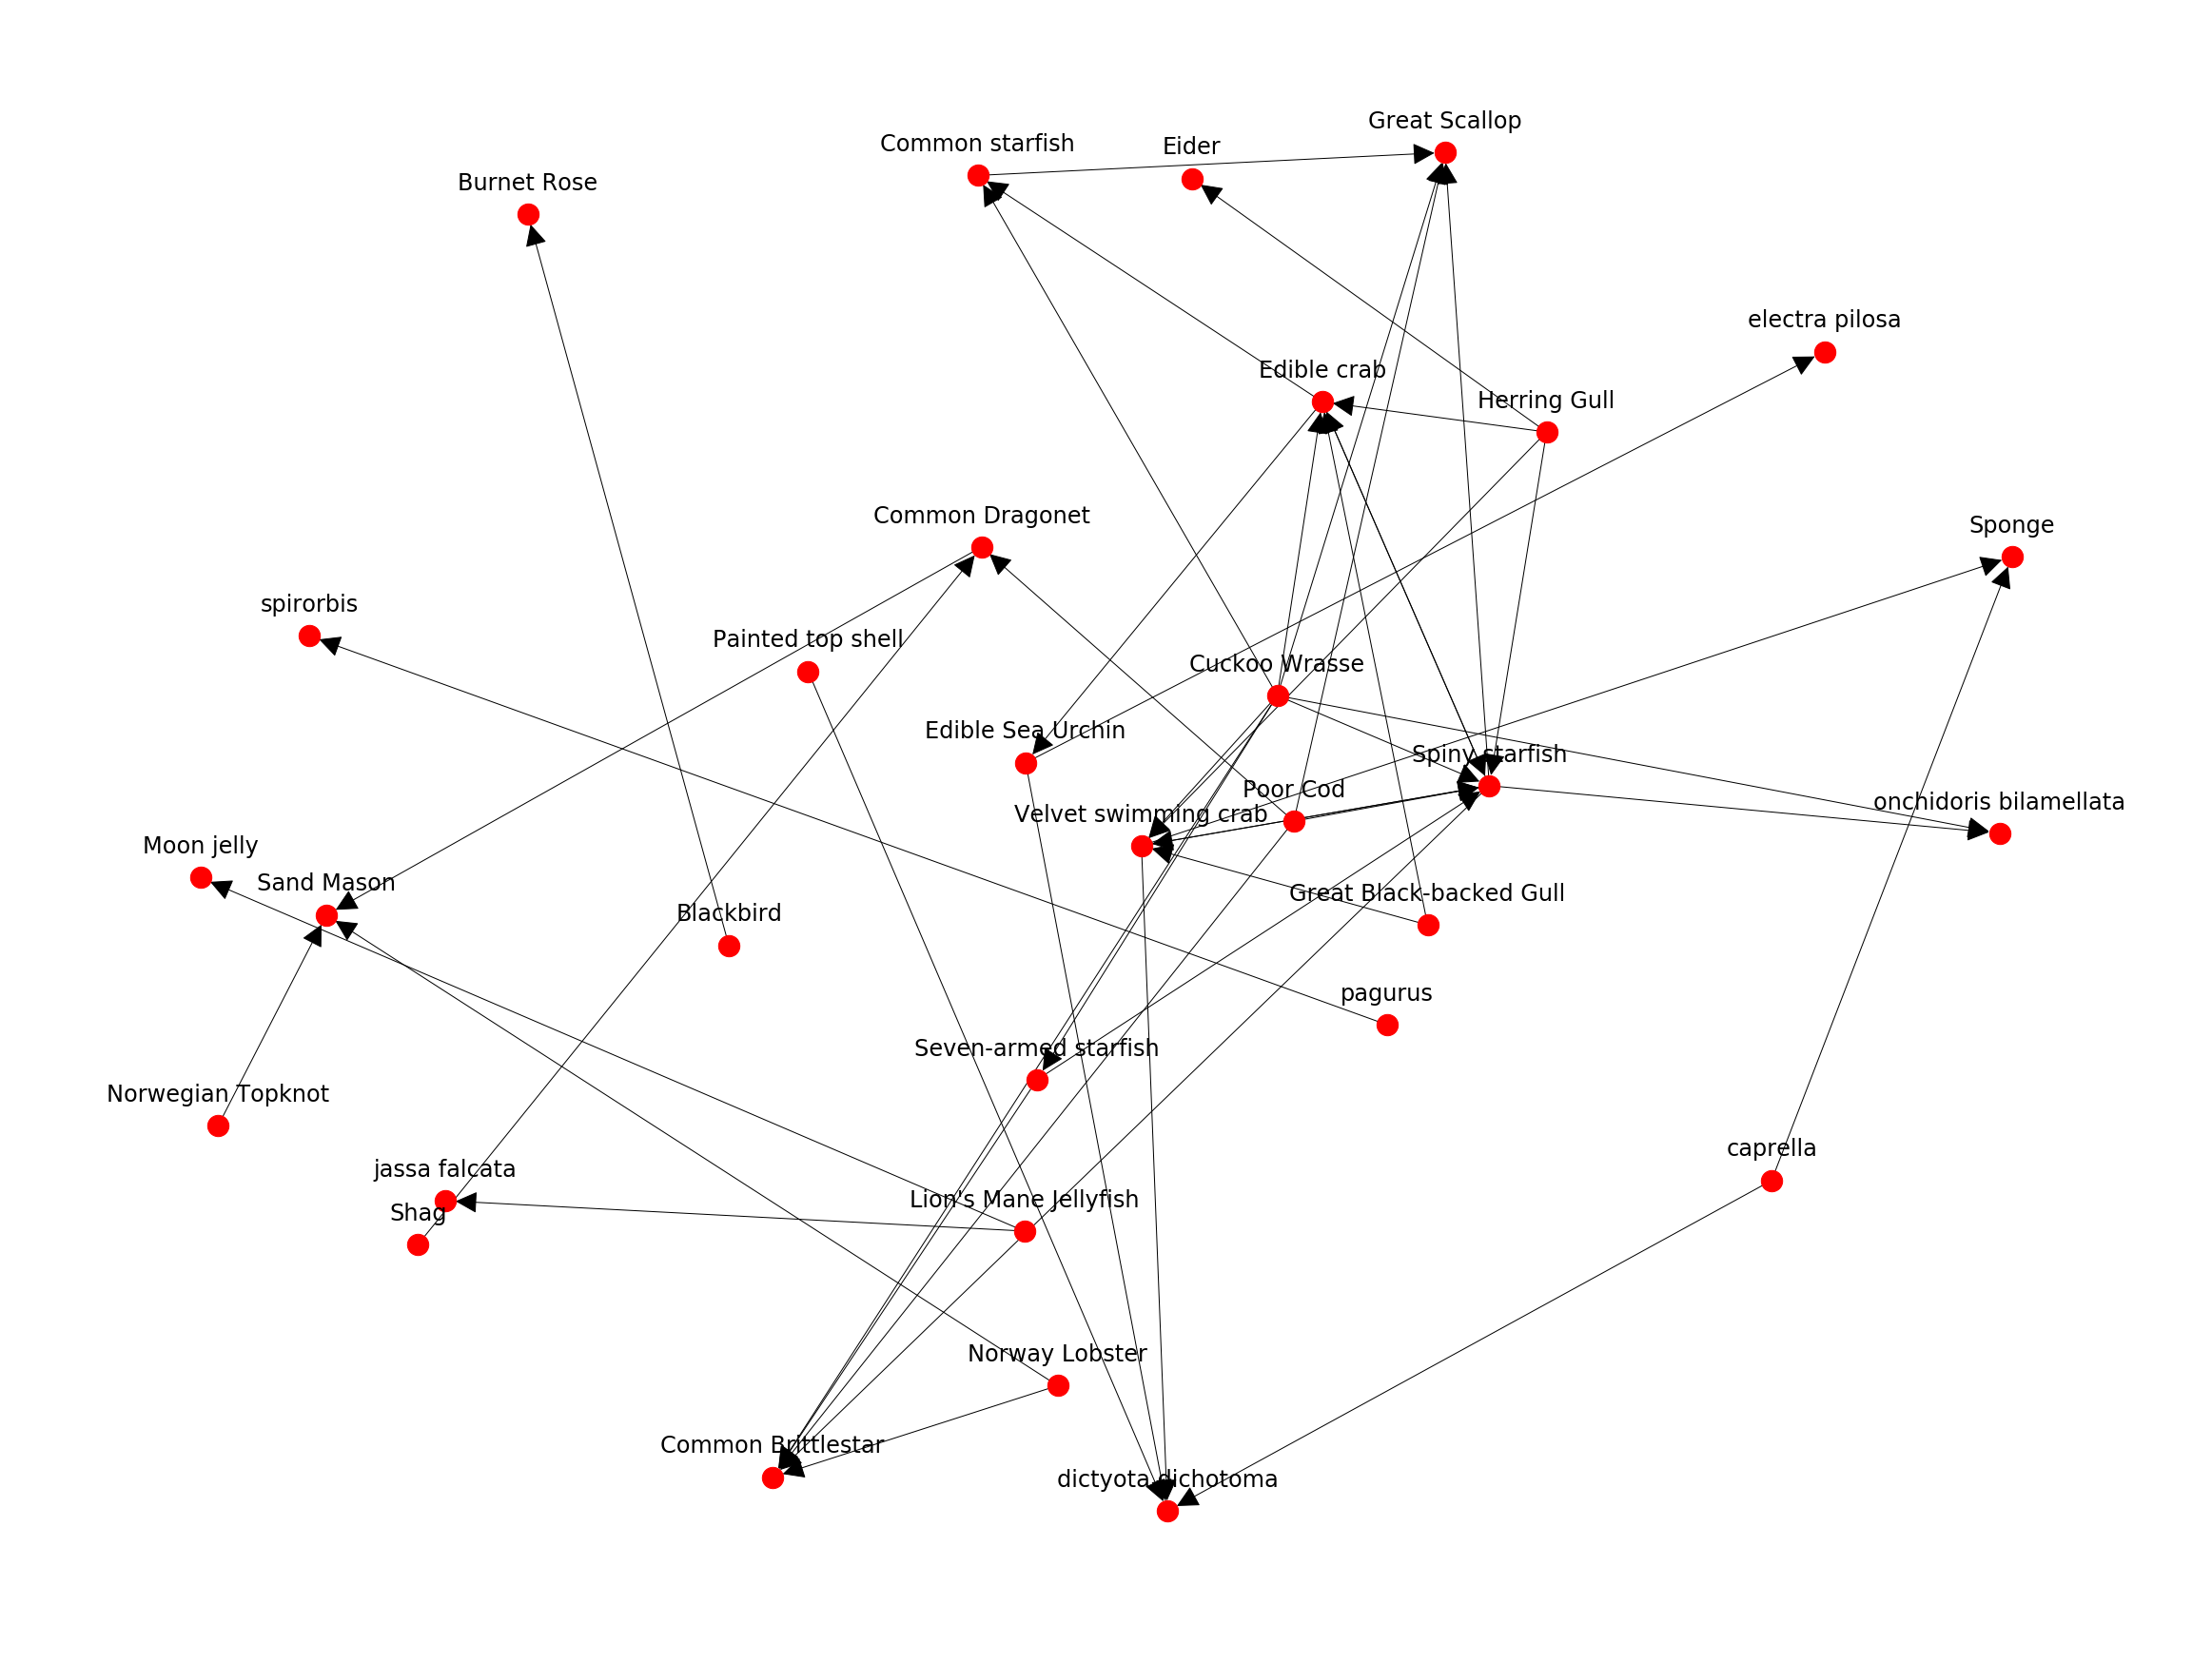

In [35]:
G,mapping = graphFoodWeb(dateRange=(2014,2020),directed=True)
pos=nx.spring_layout(G,k=1)
print(len(G.nodes()),len(G.edges()))
regularLinks = G.edges()
nx.draw(G,pos,node_size=500,arrowsize=50,arrowstyle='-|>',node_color='red')
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)

# saveGraphToFile(G,'animals.txt')
# labelsInOrder = list(G.nodes())
# #attributesInOrder = list(map(lambda x: inTourism[x],G.nodes()))
# np.savetxt('animalsForFun.txt', labelsInOrder, '%s')
# # np.savetxt('animal.txt', attributesInOrder, "%s")

In [25]:
genusLinks

OutEdgeView([('halichoerus grypus', 'trisopterus minutus'), ('larus marinus', 'patella pellucida'), ('larus marinus', 'necora puber'), ('larus marinus', 'cancer pagurus'), ('larus marinus', 'liocarcinus marmoreus'), ('larus marinus', 'anomia'), ('asterias rubens', 'pecten maximus'), ('callionymus lyra', 'lanice conchilega'), ('larus argentatus', 'patella pellucida'), ('larus argentatus', 'somateria mollissima'), ('larus argentatus', 'necora puber'), ('larus argentatus', 'cancer pagurus'), ('larus argentatus', 'liocarcinus marmoreus'), ('larus argentatus', 'marthasterias glacialis'), ('larus argentatus', 'anomia'), ('lathyrus pratensis', 'lathyrus linifolius'), ('somateria mollissima', 'laminaria hyperborea'), ('necora puber', 'patella pellucida'), ('necora puber', 'balanus crenatus'), ('necora puber', 'liocarcinus marmoreus'), ('necora puber', 'dictyota dichotoma'), ('necora puber', 'marthasterias glacialis'), ('phalacrocorax aristotelis', 'callionymus lyra'), ('phalacrocorax aristotel

In [27]:
saved = set(genusLinks) - set(regularLinks)

In [28]:
saved

{('cancer pagurus', 'anomia'),
 ('cancer pagurus', 'pagurus'),
 ('halichoerus grypus', 'trisopterus minutus'),
 ('labrus mixtus', 'anomia'),
 ('labrus mixtus', 'pagurus'),
 ('labrus mixtus', 'patella pellucida'),
 ('larus argentatus', 'anomia'),
 ('larus argentatus', 'liocarcinus marmoreus'),
 ('larus argentatus', 'patella pellucida'),
 ('larus marinus', 'anomia'),
 ('larus marinus', 'liocarcinus marmoreus'),
 ('larus marinus', 'patella pellucida'),
 ('lathyrus pratensis', 'lathyrus linifolius'),
 ('marthasterias glacialis', 'anomia'),
 ('marthasterias glacialis', 'liocarcinus marmoreus'),
 ('marthasterias glacialis', 'patella pellucida'),
 ('necora puber', 'balanus crenatus'),
 ('necora puber', 'liocarcinus marmoreus'),
 ('necora puber', 'patella pellucida'),
 ('phalacrocorax aristotelis', 'labrus mixtus'),
 ('somateria mollissima', 'laminaria hyperborea'),
 ('trisopterus minutus', 'liocarcinus marmoreus'),
 ('trisopterus minutus', 'pagurus'),
 ('trisopterus minutus', 'patella pelluci

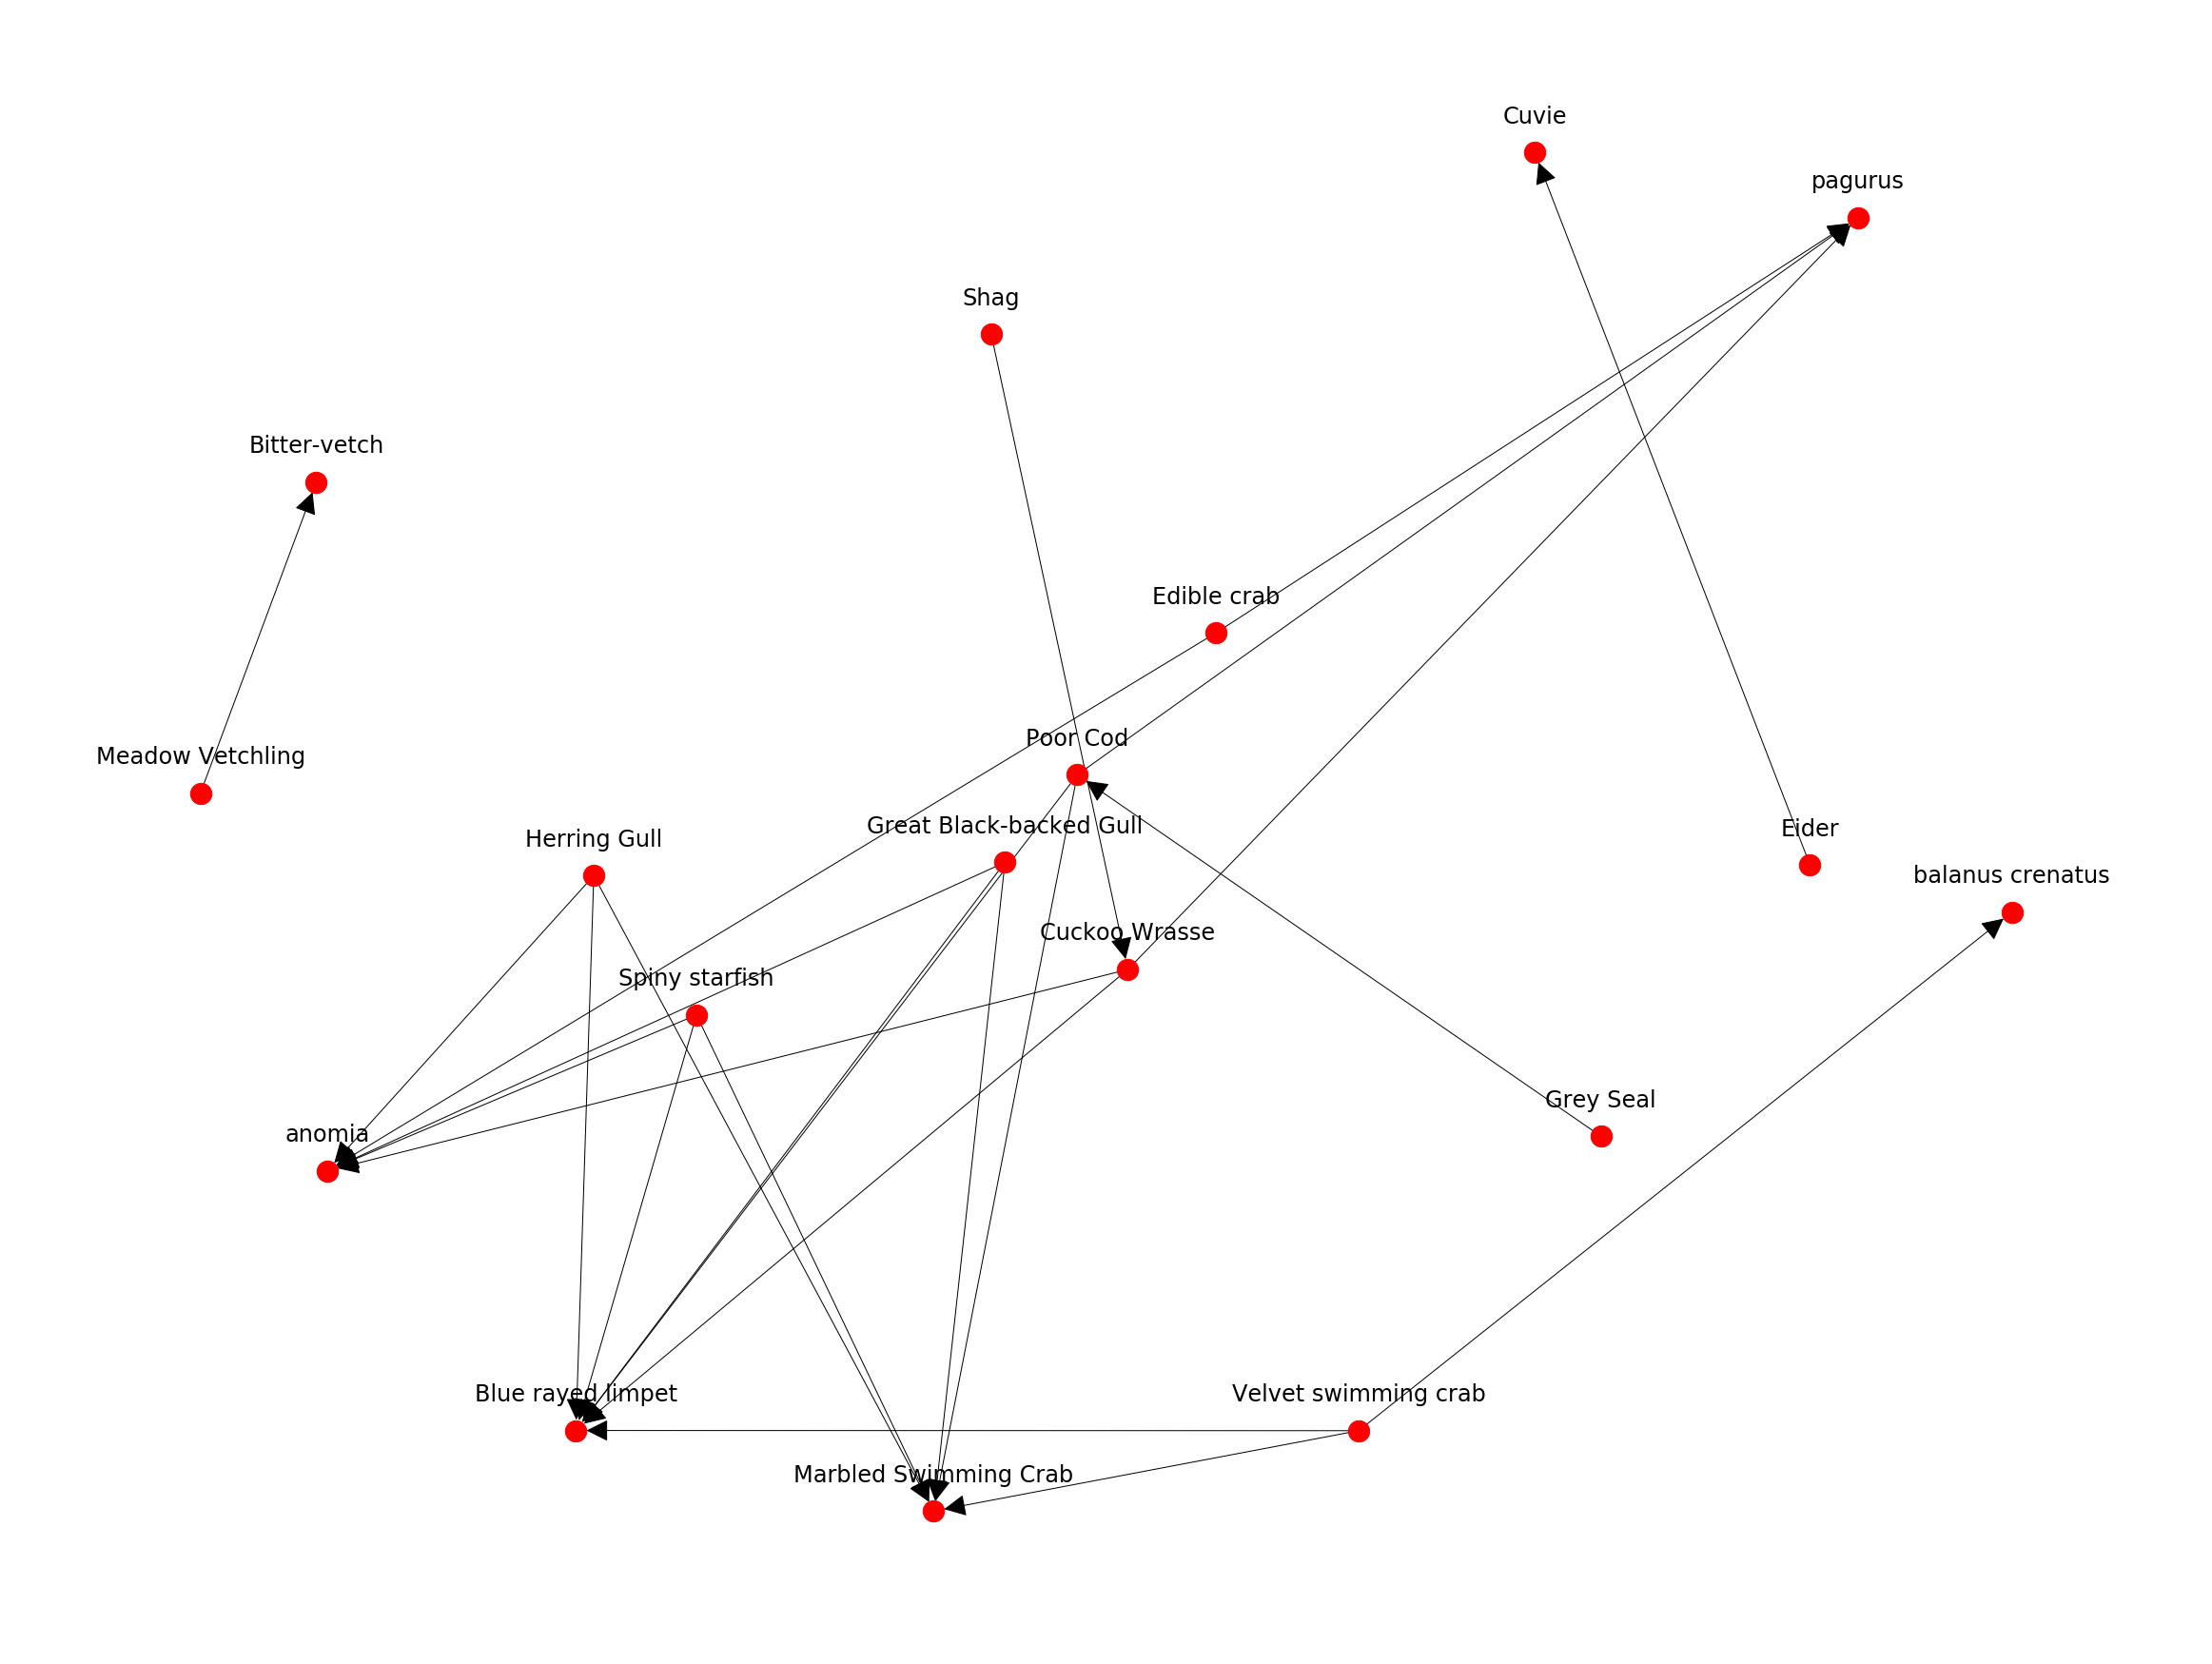

In [30]:
G = nx.DiGraph()

for from_,to_ in saved:
    G.add_edge(from_,to_)

pos=nx.spring_layout(G,k=1)
nx.draw(G,pos,node_size=500,arrowsize=50,arrowstyle='-|>',node_color='red')
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)